In [1]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# lecture example
lecture_x= pd.Series([7,35,5,9,8,3,10,12,8],name="X")
lecture_x

0     7
1    35
2     5
3     9
4     8
5     3
6    10
7    12
8     8
Name: X, dtype: int64

$\mu = \bar{X} = \frac{X_{1}+X_{2}+X_{3}+...+X_{n}} {n} = \frac{\displaystyle\sum_{i=1}^{n}X_i} {n}$

The mean is the unbiased estimator of the expectation of a random variable ($\mu = E[X_i] = E[\bar{X}] )$

In [3]:
print("The mean is:" +str(np.mean(lecture_x)))

The mean is:10.777777777777779


In [4]:
lecture_x.describe()

count     9.000000
mean     10.777778
std       9.457507
min       3.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      35.000000
Name: X, dtype: float64

In [5]:
# The sample standard deviation using n-1 in the formula
mean_x=np.mean(lecture_x)
mean_x

10.777777777777779

In [6]:
sum_of_squares_xi=(lecture_x-mean_x)**2
sum_of_squares_xi

0     14.271605
1    586.716049
2     33.382716
3      3.160494
4      7.716049
5     60.493827
6      0.604938
7      1.493827
8      7.716049
Name: X, dtype: float64

In [7]:
sum_of_squares_x=np.sum((lecture_x-mean_x)**2)
sum_of_squares_x

715.5555555555555

In [8]:
n=len(lecture_x)
n

9

In [9]:
variance_x=sum_of_squares_x/(n-1)
variance_x

89.44444444444444

In [10]:
np.sqrt(variance_x)

9.457507306074072

In [11]:
np.sqrt(sum_of_squares_x/(n-1))

9.457507306074072

In [12]:
# the pandas library uses n-1 as the default
# the numpy library uses n as the default for std

In [13]:
# using numpy
np.var(lecture_x,ddof=1)

89.44444444444446

In [14]:
#using pandas dataframe
lecture_x.var()

89.44444444444446

# The mean minimizes the sum of the squared deviations 

Let's show this graphically by creating a creating a function to return a possible mean squared deviation from a list of possible means (starting at the minimimum value in the dataset and ending at the maximum value in the data set), and plotting these togther to see at what possible mean value the mean squared deviation is the lowest. 

In [15]:
def test_var(i):
    return ( (np.sum(np.square(lecture_x-i) ) ) / (len(lecture_x)-1) )

Text(20, 89.44, 'Mean = 10.78')

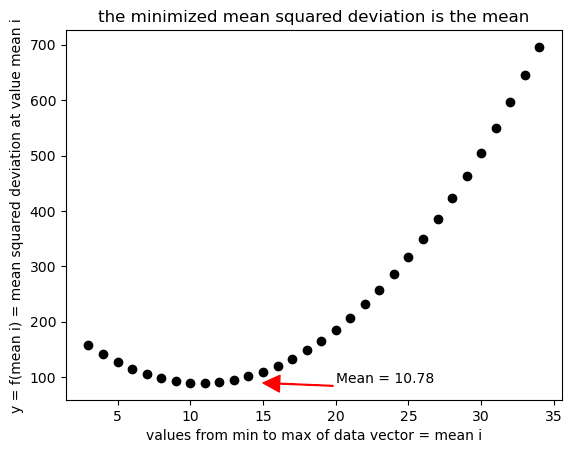

In [16]:
for i in np.arange(min(lecture_x),max(lecture_x),1):
    plt.scatter(i,test_var(i),color='black')
plt.xlabel("values from min to max of data vector = mean i")
plt.ylabel("y = f(mean i) = mean squared deviation at value mean i")
plt.title("the minimized mean squared deviation is the mean")
plt.annotate('Mean = 10.78', xy =(15,89.44),
                xytext =(20, 89.44),arrowprops = dict(facecolor ='red',edgecolor="red",width=.5),)

In [17]:
#  the values calculated for possible mean squared deviations = y =f(mean i) using a step size increase of 2
for i in np.arange(min(lecture_x),max(lecture_x),2):
    print(test_var(i))

157.5
127.0
105.5
93.0
89.5
95.0
109.5
133.0
165.5
207.0
257.5
317.0
385.5
463.0
549.5
645.0


# Let's find the minimum by calculus

we need a package that will allow us to work and display in calculus (note that you do not have to use a python calculus package for the course, this is for demonstartion purposes only).  
conda install -c anaconda sympy

In [18]:
import sympy as sm
from sympy import *
from sympy import diff

if you have a vector of data lecture_XA then the mean squared deviation from a value in lecture_XA to a value mean_XA is

In [19]:
mean_XA=sm.Symbol('mean_XA',real=True)
lecture_XA=sm.Symbol('lecture_XA',real=True)
i,n=sm.symbols('i n',integer=True)
y1=(sm.Sum(((lecture_XA - mean_XA)**2),(i,1,n)))
display(y1)

#note:  it works out with the mean of the squared deviations or 1/(n-1) in the demominator, but works for minimizing the squared deviations too.

Sum((lecture_XA - mean_XA)**2, (i, 1, n))

Expanding this expression out and simplyfing you get

In [20]:
y=(sm.Sum((lecture_XA**2),(i,1,n))) - (2*mean_XA*sm.Sum((lecture_XA),(i,1,n))) + (n*mean_XA**2)
display(y)

mean_XA**2*n - 2*mean_XA*Sum(lecture_XA, (i, 1, n)) + Sum(lecture_XA**2, (i, 1, n))

In [21]:
y_prime=diff(y,mean_XA)
display(y_prime)

2*mean_XA*n - 2*Sum(lecture_XA, (i, 1, n))

This is set to 0 and solved for mean_XA

In [22]:
y2=Eq(((sm.Sum((lecture_XA),(i,1,n))) / n),mean_XA)
display(y2)

Eq(Sum(lecture_XA, (i, 1, n))/n, mean_XA)

to show that this is indeed the minimum, calculate the second derivative w.r.t. to a, which is yprimeprime=2>0 so it is indeed a minimum 

In [23]:
y2.subs([(n,9)])

Eq(Sum(lecture_XA, (i, 1, 9))/9, mean_XA)

In [24]:
lecture_xA= ([7,35,5,9,8,3,10,12,8])
mean_xA=np.sum(lecture_xA) / len(lecture_xA)
mean_xA

10.777777777777779

# Let's find the least mean squared deviation by geometry

The mean minimizes the mean squares of the deviations from the mean; it is the point on which a distribution would balance

The first moment of a probability distribution is the expected values, the second is the variance. 

In [25]:
x_values= pd.Series([7,35,5,9,8,3,10,12,8],name="X")
deviations_x_values=((x_values-np.mean(x_values)))
squares_x_values=((x_values-np.mean(x_values))**2)

Text(0, 0.5, 'y = deviation from mean')

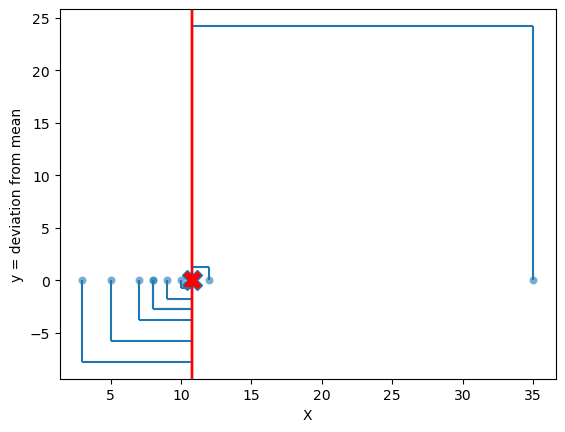

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.scatterplot(x=x_values,y=0,alpha=0.6)
plt.plot(np.mean(x_values),0,marker="X",markerfacecolor="red",markersize=15)
for i in np.arange(0,len(x_values),1):
    plt.vlines(x=[x_values[i]],ymin=[0],ymax=[(deviations_x_values[i])])
    plt.hlines(y=[(deviations_x_values[i])], xmin=[np.mean(x_values)], xmax=[x_values[i]])
    plt.axvline(x=np.mean(x_values),color='red')
plt.ylabel("y = deviation from mean")

The benefits of squaring include:

- Squaring always gives a non-negative value, so the sum will always be zero or higher.
- Simplyfies computations
- Squaring emphasizes larger differences, a feature that turns out to be both good and bad (think of the effect outliers have).

It is easy to see this way that this method provides a lot of weight to outliers, since you are squaring each term and weighing large erros more than small ones.  

In [27]:
squares_x_values

0     14.271605
1    586.716049
2     33.382716
3      3.160494
4      7.716049
5     60.493827
6      0.604938
7      1.493827
8      7.716049
Name: X, dtype: float64

Text(0, 0.5, 'y = squared deviation from mean')

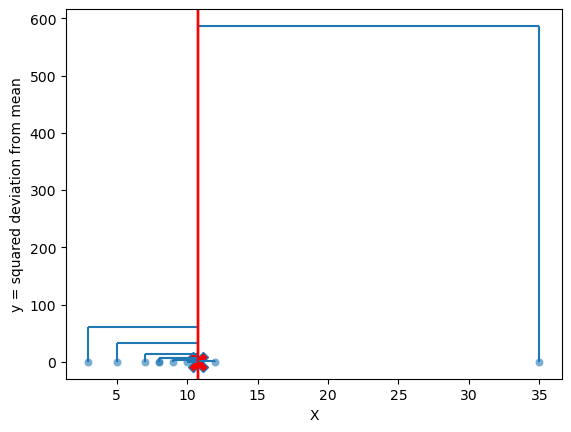

In [28]:
sns.scatterplot(x=x_values,y=0,alpha=0.6)
plt.plot(np.mean(x_values),0,marker="X",markerfacecolor="red",markersize=15)
for i in np.arange(0,len(x_values),1):
    plt.vlines(x=[x_values[i]],ymin=[0],ymax=[(squares_x_values[i])])
    plt.hlines(y=[(squares_x_values[i])], xmin=[np.mean(x_values)], xmax=[x_values[i]])
    plt.axvline(x=np.mean(x_values),color='red')
plt.ylabel("y = squared deviation from mean")

In [29]:
print("The mean is:" +str(np.mean(x_values)))

The mean is:10.777777777777779


In [30]:
x_values_wo35= pd.Series([7,5,9,8,3,10,12,8],name="X")
deviations_x_values_wo35=((x_values_wo35-np.mean(x_values_wo35)))
squares_x_values_wo35=((x_values_wo35-np.mean(x_values_wo35))**2)

If we take out the outlier x=35, then we have this:

Text(0, 0.5, 'y = squared deviation from mean')

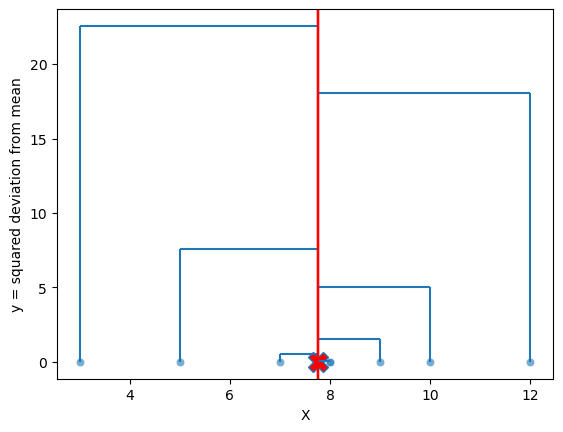

In [31]:
sns.scatterplot(x=x_values_wo35,y=0,alpha=0.6)
plt.plot(np.mean(x_values_wo35),0,marker="X",markerfacecolor="red",markersize=15)
for i in np.arange(0,len(x_values_wo35),1):
    plt.vlines(x=[x_values_wo35[i]],ymin=[0],ymax=[(squares_x_values_wo35[i])])
    plt.hlines(y=[(squares_x_values_wo35[i])], xmin=[np.mean(x_values_wo35)], xmax=[x_values_wo35[i]])
    plt.axvline(x=np.mean(x_values_wo35),color='red')
plt.ylabel("y = squared deviation from mean")

In [32]:
print("The mean is:" +str(np.mean(x_values_wo35)))

The mean is:7.75


# Let's find the least mean squared deviation by algebra

Let's find the value (a= $\hat{X}$) that minimizes the mean of the squared deviations (the derivation is not needed, and is shown for informational purposes only)

$\sigma^2 = E[(X-a)^2] = \frac{\displaystyle\sum_{i=1}^{n}} {n} [(X_{i}-a)^2] $  
$ = E[(X-\bar{X}+\bar{X}-a)^2]$  
$(\bar{X} \text{ is the mean of X and cancels out}) $  
$ = E[((X-\bar{X}) + (\bar{X}-a))^2]$  
$ = E[(X-\bar{X})^2 + (\bar{X}-a)^2 + 2(\bar{X}-a)(X-\bar{X})]$  
$(\text{the expectation of a sum is the sum of the expectations)}$    
$(\text{the constants can be pulled out of the expectations)}$  
$ = E[(X-\bar{X})^2] + E[(\bar{X}-a)^2] + 2(\bar{X}-a) E[X-\bar{X}]$  
$(\text{replaced with definition of variance; expectation of a constant is the constant)}$   
$(\text{the expectation of X-}\bar{X}= E[X] -E[\bar{X}] = \bar{X} - \bar{X} = 0\text{)}$  
$ = var(X) + (\bar{X}-a)^2 + 2(\bar{X}-a) * 0$  
$ = var(X) + (\bar{X}-a)^2$  
$(\text{this is mimimum when a =}\bar{X}\text{)}$ 